In [ ]:
# 201500684 박종혁

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import csv
import pandas
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

iris = load_iris()
irisdf = pandas.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
# irisdf['target'] = irisdf['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})
irisdf.groupby(['target']).mean()

# 총 150개의 데이터를 80(4/5):20(1/5) 비율로 나눈다.
train_set, test_set= train_test_split(irisdf, test_size=0.20)

train_set.to_csv("iris_data/train_dataset.csv")
test_set.to_csv("iris_data/test_dataset.csv")
len(train_set)
len(test_set)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


120

30

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2
47,4.6,3.2,1.4,0.2,0
17,5.1,3.5,1.4,0.3,0
68,6.2,2.2,4.5,1.5,1
82,5.8,2.7,3.9,1.2,1
...,...,...,...,...,...
49,5.0,3.3,1.4,0.2,0
29,4.7,3.2,1.6,0.2,0
38,4.4,3.0,1.3,0.2,0
74,6.4,2.9,4.3,1.3,1


In [195]:
# 신경망 학습시키기
import scipy.special
import numpy

# 신경망 질의
# 신경망 클래스 정의3
class NeuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력계층
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행렬
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, - 0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, - 0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성함수 - 시그모이드
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # 신경망 학습
    def train(self, inputs_list, targets_list):
        # 입력리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # 은닉계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종출력계층으로 들어오는 신호 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종출력계층에서 들어오는 신호 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제값 - 계산값)
        output_errors = targets - final_outputs
        # 은닉계층과 출려계층 간의 가중치 업데이트
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # 은닉계층과 출력계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # 입력계층과 은닉계층 간의 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
    # 신경망 질의
    def query(self, inputs_list):
        # 입력리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉계층에서 나가는 신호를 계산
        hiddne_outputs = self.activation_function(hidden_inputs)
        # 최종출력계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hiddne_outputs)
        # 최종출력계층으로 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
# 노드의 갯수
input_node = 4
hidden_node = 10
output_node = 3
# 학습률
learning_rate = 0.15

n = NeuralNetwork(input_node, hidden_node, output_node, learning_rate)

### input_node의 개수와 output_node의 개수

붓꽃 데이터는 sepal length (cm),sepal width (cm),petal length (cm),petal width (cm) 이렇게 총 4개의 입력값을 가진다. 이 입력값으로 유추해 붓꽃의 종류를 맞추게 되는데, 붓꽃의 종류는 setosa, versicolor, virginica로 3가지이므로 출력값은 3개가 된다. 입력값과 출력값의 개수를 node의 개수와 맞춰줘야하기 때문에 input_node는 4개가 되고, output_node는 3개가 된다.

In [196]:
# 의 레코드를 가지는 전체 테스트 데이터 모음
training_data_file = open("iris_data/train_dataset.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

# print(training_data_list)

In [197]:
# 신경망 학습시키기

# 3회 학습
epoch = 3

for i in range(epoch):
    for idx, record in enumerate(training_data_list):
        if idx == 0: continue
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(",")
        # 입력 값의 범위와 값 조정
#         all_values[1:-1]
        inputs = np.asfarray(all_values[1:-1])
    #     inputs = np.asfarray(list(map(all_values[:-1], float)))
        # 결과 값 생성
        targets = np.zeros(output_node)
        # all_values[0]은 이 레코드에 대한 결과값
        targets[int(all_values[-1])] = 1
        n.train(inputs, targets)
print("학습완료")

학습완료


In [198]:
scorecard = []

test_data_file = open("iris_data/test_dataset.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

for idx, record in enumerate(test_data_list):
    if idx == 0: continue
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(",")
    # 정답은 첫번째 값
    correct_label = int(all_values[-1])
    print(correct_label, "correct label")
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:-1])
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    print(label, "network's answer")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        
scorecard_array = np.asarray(scorecard)
print("performance =", scorecard_array.sum() / scorecard_array.size)

1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
2 correct label
2 ne

In [201]:
point_zero_five = 0.766
point_one = 0.833
point_one_five = 0.966
point_two = 0.9
point_two_five = 0.9
point_three = 0.666
point_four = 0.766
point_five = 0.666

Text(0.5, 1.0, 'IRIS Data Classification')

(0.0, 1.0)

Text(0.5, 0, 'Learning Rate')

Text(0, 0.5, 'Performance')

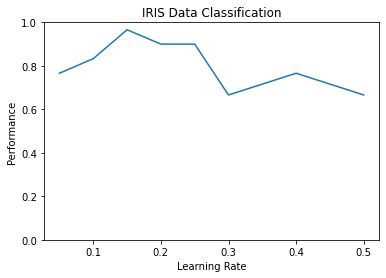

In [205]:
plt.plot([0.05, 0.1, 0.15, 0.2, .25, .3, .4, .5], 
         [point_zero_five, point_one, point_one_five, point_two, point_two_five, point_three, point_four, point_five])
plt.title("IRIS Data Classification")
plt.ylim([0,1])
plt.xlabel("Learning Rate")
plt.ylabel("Performance")
plt.show()

In [ ]:
# 201500684 박종혁